## Comparing descriptives of different dates

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import datetime
import time
from RunSilentlyDailyEtapasBuilder import RunSilentlyDailyEtapasBuilderClass
from matplotlib.dates import date2num

In [2]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., n-1)
    return h, m-h, m, m+h

In [3]:
dates = ['2017-03-01','2017-03-05', '2017-07-19']

In [4]:
turnstile_means = []
turnstile_means_errors = []
turnstile_medians = []
turnstile_stds = []
turnstile_maxs = []

no_turnstile_means = []
no_turnstile_means_errors = []
no_turnstile_medians = []
no_turnstile_stds = []
no_turnstile_maxs = []

quantile = 0.97

tic = time.clock()

for date in dates:
    etapas_builder = RunSilentlyDailyEtapasBuilderClass(date)
    [etapas_df, processed_sorted_df, filtered_df, filtered_turnstile_df, filtered_no_turnstile_df]=etapas_builder.runCompleteProcess()
    
    turnstile_q = filtered_turnstile_df.diferencia_tiempo.quantile(quantile)
    no_turnstile_q = filtered_no_turnstile_df.diferencia_tiempo.quantile(quantile)    
    
    filtered_turnstile_q_df = filtered_turnstile_df[filtered_turnstile_df.diferencia_tiempo<=turnstile_q]
    filtered_no_turnstile_q_df = filtered_no_turnstile_df[filtered_no_turnstile_df.diferencia_tiempo<=no_turnstile_q]
    
    turnstile_means.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].mean())
    turnstile_means_errors.append(mean_confidence_interval(filtered_turnstile_q_df['diferencia_tiempo_secs'])[0])
    turnstile_stds.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].std())
    turnstile_medians.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].quantile(0.50))
    turnstile_maxs.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].max())
    
    no_turnstile_means.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].mean())
    no_turnstile_means_errors.append(mean_confidence_interval(filtered_no_turnstile_q_df['diferencia_tiempo_secs'])[0])
    no_turnstile_stds.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].std())    
    no_turnstile_medians.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].quantile(0.50))
    no_turnstile_maxs.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].max())
    del etapas_builder
    
toc = time.clock()  
toc-tic

Not found in turnstile database: 1614656
Not found in turnstile database: 656097
Not found in turnstile database: 1637796


46.559596271518025

* Plotting Means (to <strong>report</strong>)

In [5]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

width = 0.2

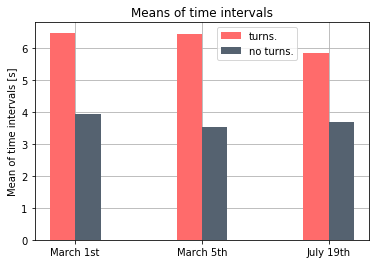

In [6]:
ind = np.arange(3)
fig_1, ax_1 = plt.subplots()

p1 = ax_1.bar(ind, turnstile_means , width = width, color = colors[3], zorder=3)
p2 = ax_1.bar(ind+width, no_turnstile_means , width = width, color = colors[0],zorder=3)
ax_1.set_xticks(ind + width / 2)
ax_1.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_1.set_title('Means of time intervals')
ax_1.set_ylabel('Mean of time intervals [s]')
ax_1.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_meansComparison.pdf')

* Plotting Means (to <strong>ppt</strong>)

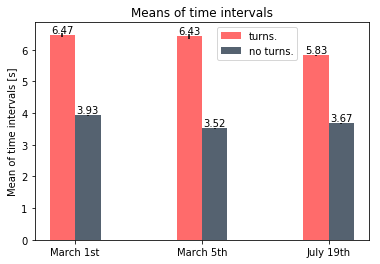

In [7]:
ind = np.arange(3)
fig_2, ax_2 = plt.subplots()

p1 = ax_2.bar(ind, turnstile_means , width = width, color = colors[3], yerr=turnstile_means_errors)
p2 = ax_2.bar(ind+width, no_turnstile_means , width = width, color = colors[0], yerr=no_turnstile_means_errors)
ax_2.set_xticks(ind + width / 2)
ax_2.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_2.set_title('Means of time intervals')
ax_2.set_ylabel('Mean of time intervals [s]')
#ax_2.grid(zorder=0)

x_labels = [0.05,0.15,1.05,1.15,2.05,2.15]
rects = ax_2.patches
labels_means = [ '%.2f' % elem for elem in turnstile_means ]
labels_no_means = [ '%.2f' % elem for elem in no_turnstile_means ]
labels = []

for x in labels_means:
    labels.append(x)

for x in labels_no_means:
    labels.append(x)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_2.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')


plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_meansComparisonToPPT.pdf')
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/3_meansComparisonToPPT.pdf')

* Plotting std (to <strong>report</strong>)

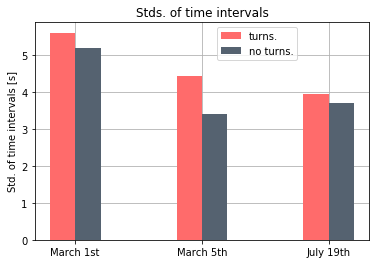

In [8]:
ind = np.arange(3)
fig, ax_3 = plt.subplots()

p1 = ax_3.bar(ind, turnstile_stds , width = width, color = colors[3], zorder=3)
p2 = ax_3.bar(ind+width, no_turnstile_stds , width = width, color = colors[0],zorder=3)
ax_3.set_xticks(ind + width / 2)
ax_3.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_3.set_title('Stds. of time intervals')
ax_3.set_ylabel('Std. of time intervals [s]')
ax_3.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_stdsComparison.pdf')

* Plotting std (to <strong>ppt</strong>)

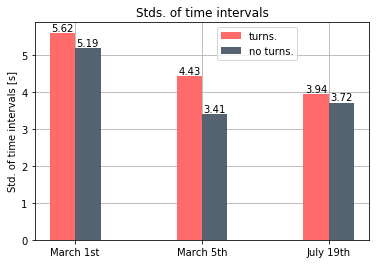

In [9]:
ind = np.arange(3)
fig, ax_4 = plt.subplots()

p1 = ax_4.bar(ind, turnstile_stds , width = width, color = colors[3], zorder=3)
p2 = ax_4.bar(ind+width, no_turnstile_stds , width = width, color = colors[0],zorder=3)
ax_4.set_xticks(ind + width / 2)
ax_4.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_4.set_title('Stds. of time intervals')
ax_4.set_ylabel('Std. of time intervals [s]')
ax_4.grid(zorder=0)

x_labels = [0.05,0.15,1.05,1.15,2.05,2.15]
rects = ax_4.patches
labels_stds = [ '%.2f' % elem for elem in turnstile_stds ]
labels_no_stds = [ '%.2f' % elem for elem in no_turnstile_stds ]
labels = []

for x in labels_stds:
    labels.append(x)

for x in labels_no_stds:
    labels.append(x)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_4.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_stdsComparisonToPPT.pdf')

* Plotting Medians (to <strong>report</strong>)

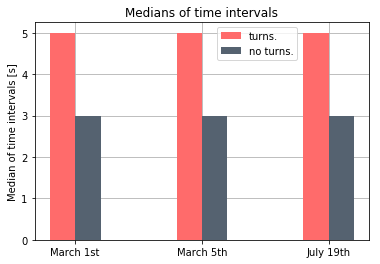

In [10]:
ind = np.arange(3)
fig, ax_5 = plt.subplots()

p1 = ax_5.bar(ind, turnstile_medians , width = width, color = colors[3], zorder=3)
p2 = ax_5.bar(ind+width, no_turnstile_medians , width = width, color = colors[0],zorder=3)
ax_5.set_xticks(ind + width / 2)
ax_5.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_5.set_title('Medians of time intervals')
ax_5.set_ylabel('Median of time intervals [s]')
ax_5.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_mediansComparison.pdf')

* Plotting Medians (to <strong>ppt</strong>)

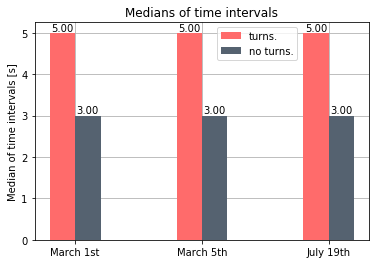

In [11]:
ind = np.arange(3)
fig, ax_6 = plt.subplots()

p1 = ax_6.bar(ind, turnstile_medians , width = width, color = colors[3], zorder=3)
p2 = ax_6.bar(ind+width, no_turnstile_medians , width = width, color = colors[0],zorder=3)
ax_6.set_xticks(ind + width / 2)
ax_6.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_6.set_title('Medians of time intervals')
ax_6.set_ylabel('Median of time intervals [s]')
ax_6.grid(zorder=0)

x_labels = [0.05,0.15,1.05,1.15,2.05,2.15]
rects = ax_6.patches
labels_medians = [ '%.2f' % elem for elem in turnstile_medians ]
labels_no_medians = [ '%.2f' % elem for elem in no_turnstile_medians ]
labels = []

for x in labels_medians:
    labels.append(x)

for x in labels_no_medians:
    labels.append(x)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_6.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_mediansComparisonToPPT.pdf')

* Plotting Maxs <strong>(to report)</strong>

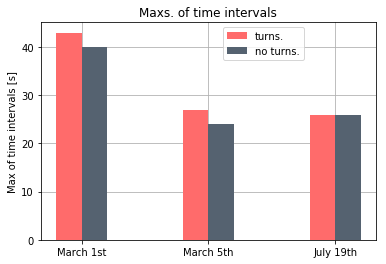

In [12]:
ind = np.arange(3)
fig, ax_7 = plt.subplots()

p1 = ax_7.bar(ind, turnstile_maxs , width = width, color = colors[3], zorder=3)
p2 = ax_7.bar(ind+width, no_turnstile_maxs , width = width, color = colors[0],zorder=3)
ax_7.set_xticks(ind + width / 2)
ax_7.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_7.set_title('Maxs. of time intervals')
ax_7.set_ylabel('Max of time intervals [s]')
ax_7.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_maxsComparison.pdf')

* Plotting Maxs (to ppt)

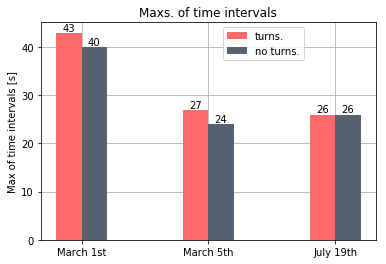

In [13]:
ind = np.arange(3)
fig, ax_8 = plt.subplots()

p1 = ax_8.bar(ind, turnstile_maxs , width = width, color = colors[3], zorder=3)
p2 = ax_8.bar(ind+width, no_turnstile_maxs , width = width, color = colors[0],zorder=3)
ax_8.set_xticks(ind + width / 2)
ax_8.set_xticklabels(('March 1st', 'March 5th', 'July 19th'))
ax_8.set_title('Maxs. of time intervals')
ax_8.set_ylabel('Max of time intervals [s]')
ax_8.grid(zorder=0)


x_labels = [0.05,0.15,1.05,1.15,2.05,2.15]
rects = ax_8.patches
labels_maxs = [ '%.0f' % elem for elem in turnstile_maxs ]
labels_no_maxs = [ '%.0f' % elem for elem in no_turnstile_maxs ]
labels = []

for x in labels_maxs:
    labels.append(x)

for x in labels_no_maxs:
    labels.append(x)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_8.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_maxsComparisonToPPT.pdf')

### Closed